In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [187]:
import uproot
import awkward as ak

def shift_nans(input_array):
    
    nan_mask = np.isnan(input_array)
    output_array = np.array([np.concatenate((row[nan_mask_row], row[~nan_mask_row])) for row, nan_mask_row in zip(input_array, nan_mask)])

    return output_array

def process_coords(input_ak_array):
    return shift_nans(ak.to_numpy(ak.pad_none(input_ak_array, target = 6, clip=True)).filled(np.nan))
    

for i in range(0, 2):
    output_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/df" + str(i) + ".csv"
    trackstates_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/" + str(i) + "/trackstates_fitter.root"
    tracksummary_path = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/" + str(i) + "/tracksummary_fitter.root"

    file = uproot.open(trackstates_path)
    tree_input = file["trackstates"]

    X_TRUTH = process_coords(tree_input["t_x"].array())
    GLOBAL_X_HIT = process_coords(tree_input["g_x_hit"].array())
    FIT_X_HIT = process_coords(tree_input["g_x_smt"].array())
    LOCAL_X_HIT = process_coords(tree_input["l_x_hit"].array())

    Y_TRUTH = process_coords(tree_input["t_y"].array())
    GLOBAL_Y_HIT = process_coords(tree_input["g_y_hit"].array())
    FIT_Y_HIT = process_coords(tree_input["g_y_smt"].array())
    LOCAL_Y_HIT = process_coords(tree_input["l_y_hit"].array())
    RES_Y_HIT = process_coords(tree_input["res_y_hit"].array())

    Z_TRUTH = process_coords(tree_input["t_z"].array())
    GLOBAL_Z_HIT = process_coords(tree_input["g_z_hit"].array())
    FIT_Z_HIT = process_coords(tree_input["g_z_smt"].array())

    FIT_PT = process_coords(tree_input["pT_smt"].array())
    FIT_PX = process_coords(tree_input["px_smt"].array())
    FIT_PY = process_coords(tree_input["py_smt"].array())
    FIT_PZ = process_coords(tree_input["pz_smt"].array())

    file.close()

    file = uproot.open(tracksummary_path)
    tree_input = file["tracksummary"]

    QOP_FIT = ak.to_numpy(ak.flatten(tree_input["eQOP_fit"].array()))
    PHI_FIT = ak.to_numpy(ak.flatten(tree_input["ePHI_fit"].array()))
    THETA_FIT = ak.to_numpy(ak.flatten(tree_input["eTHETA_fit"].array()))

    P_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_p"].array()))
    Q_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_charge"].array()))
    PZ_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_pz"].array()))
    PHI_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_phi"].array()))
    THETA_TRUTH = ak.to_numpy(ak.flatten(tree_input["t_theta"].array()))

    CHI2SUM = ak.to_numpy(ak.flatten(tree_input["chi2Sum"].array()))
    NDF = ak.to_numpy(ak.flatten(tree_input["NDF"].array()))

    file.close()

    P_FIT = Q_TRUTH/QOP_FIT
    PZ_FIT = P_FIT*np.cos(THETA_FIT)

    df_columns = [
                "QOP_FIT", "PHI_FIT", "THETA_FIT", "P_FIT", "PZ_FIT", 
                "P_TRUTH", "Q_TRUTH", "PZ_TRUTH", "PHI_TRUTH", "THETA_TRUTH", 
                "CHI2SUM", "NDF", 
                "FIT_PX_6", "FIT_PX_5", "FIT_PX_4", "FIT_PX_3", "FIT_PX_2", "FIT_PX_1",
                "FIT_PY_6", "FIT_PY_5", "FIT_PY_4", "FIT_PY_3", "FIT_PY_2", "FIT_PY_1",
                "FIT_PZ_6", "FIT_PZ_5", "FIT_PZ_4", "FIT_PZ_3", "FIT_PZ_2", "FIT_PZ_1", 
                "X_TRUTH_6", "X_TRUTH_5", "X_TRUTH_4", "X_TRUTH_3", "X_TRUTH_2", "X_TRUTH_1", 
                "GLOBAL_X_HIT_6", "GLOBAL_X_HIT_5", "GLOBAL_X_HIT_4", "GLOBAL_X_HIT_3", "GLOBAL_X_HIT_2", "GLOBAL_X_HIT_1",
                "FIT_X_HIT_6", "FIT_X_HIT_5", "FIT_X_HIT_4", "FIT_X_HIT_3", "FIT_X_HIT_2", "FIT_X_HIT_1", 
                "LOCAL_X_HIT_6", "LOCAL_X_HIT_5", "LOCAL_X_HIT_4", "LOCAL_X_HIT_3", "LOCAL_X_HIT_2", "LOCAL_X_HIT_1", 
                "Y_TRUTH_6", "Y_TRUTH_5", "Y_TRUTH_4", "Y_TRUTH_3", "Y_TRUTH_2", "Y_TRUTH_1", 
                "GLOBAL_Y_HIT_6", "GLOBAL_Y_HIT_5", "GLOBAL_Y_HIT_4", "GLOBAL_Y_HIT_3", "GLOBAL_Y_HIT_2", "GLOBAL_Y_HIT_1", 
                "FIT_Y_HIT_6", "FIT_Y_HIT_5", "FIT_Y_HIT_4", "FIT_Y_HIT_3", "FIT_Y_HIT_2", "FIT_Y_HIT_1",
                "LOCAL_Y_HIT_6", "LOCAL_Y_HIT_5", "LOCAL_Y_HIT_4", "LOCAL_Y_HIT_3", "LOCAL_Y_HIT_2", "LOCAL_Y_HIT_1",
                "RES_Y_HIT_6", "RES_Y_HIT_5", "RES_Y_HIT_4", "RES_Y_HIT_3", "RES_Y_HIT_2", "RES_Y_HIT_1",  
                "Z_TRUTH_6", "Z_TRUTH_5", "Z_TRUTH_4", "Z_TRUTH_3", "Z_TRUTH_2", "Z_TRUTH_1", 
                "GLOBAL_Z_HIT_6", "GLOBAL_Z_HIT_5", "GLOBAL_Z_HIT_4", "GLOBAL_Z_HIT_3", "GLOBAL_Z_HIT_2", "GLOBAL_Z_HIT_1",
                "FIT_Z_HIT_6", "FIT_Z_HIT_5", "FIT_Z_HIT_4", "FIT_Z_HIT_3", "FIT_Z_HIT_2", "FIT_Z_HIT_1"
    ]

    df_data = [
                QOP_FIT, PHI_FIT, THETA_FIT, P_FIT, PZ_FIT,
                P_TRUTH, Q_TRUTH, PZ_TRUTH, PHI_TRUTH, THETA_TRUTH, 
                CHI2SUM, NDF, 
                FIT_PX[:,0], FIT_PX[:,1], FIT_PX[:,2], FIT_PX[:,3], FIT_PX[:,4], FIT_PX[:,5], 
                FIT_PY[:,0], FIT_PY[:,1], FIT_PY[:,2], FIT_PY[:,3], FIT_PY[:,4], FIT_PY[:,5], 
                FIT_PZ[:,0], FIT_PZ[:,1], FIT_PZ[:,2], FIT_PZ[:,3], FIT_PZ[:,4], FIT_PZ[:,5], 
                X_TRUTH[:,0], X_TRUTH[:,1], X_TRUTH[:,2], X_TRUTH[:,3], X_TRUTH[:,4], X_TRUTH[:,5], 
                GLOBAL_X_HIT[:,0], GLOBAL_X_HIT[:,1], GLOBAL_X_HIT[:,2], GLOBAL_X_HIT[:,3], GLOBAL_X_HIT[:,4], GLOBAL_X_HIT[:,5], 
                FIT_X_HIT[:,0], FIT_X_HIT[:,1], FIT_X_HIT[:,2], FIT_X_HIT[:,3], FIT_X_HIT[:,4], FIT_X_HIT[:,5],  
                LOCAL_X_HIT[:,0], LOCAL_X_HIT[:,1], LOCAL_X_HIT[:,2], LOCAL_X_HIT[:,3], LOCAL_X_HIT[:,4], LOCAL_X_HIT[:,5], 
                Y_TRUTH[:,0], Y_TRUTH[:,1], Y_TRUTH[:,2], Y_TRUTH[:,3], Y_TRUTH[:,4], Y_TRUTH[:,5], 
                GLOBAL_Y_HIT[:,0], GLOBAL_Y_HIT[:,1], GLOBAL_Y_HIT[:,2], GLOBAL_Y_HIT[:,3], GLOBAL_Y_HIT[:,4], GLOBAL_Y_HIT[:,5],
                FIT_Y_HIT[:,0], FIT_Y_HIT[:,1], FIT_Y_HIT[:,2], FIT_Y_HIT[:,3], FIT_Y_HIT[:,4], FIT_Y_HIT[:,5],  
                LOCAL_Y_HIT[:,0], LOCAL_Y_HIT[:,1], LOCAL_Y_HIT[:,2], LOCAL_Y_HIT[:,3], LOCAL_Y_HIT[:,4], LOCAL_Y_HIT[:,5],
                RES_Y_HIT[:,0], RES_Y_HIT[:,1], RES_Y_HIT[:,2], RES_Y_HIT[:,3], RES_Y_HIT[:,4], RES_Y_HIT[:,5],  
                Z_TRUTH[:,0], Z_TRUTH[:,1], Z_TRUTH[:,2], Z_TRUTH[:,3], Z_TRUTH[:,4], Z_TRUTH[:,5], 
                GLOBAL_Z_HIT[:,0], GLOBAL_Z_HIT[:,1], GLOBAL_Z_HIT[:,2], GLOBAL_Z_HIT[:,3], GLOBAL_Z_HIT[:,4], GLOBAL_Z_HIT[:,5],
                FIT_Z_HIT[:,0], FIT_Z_HIT[:,1], FIT_Z_HIT[:,2], FIT_Z_HIT[:,3], FIT_Z_HIT[:,4], FIT_Z_HIT[:,5],  
    ]

    df = pd.DataFrame(data=np.column_stack(df_data), columns=df_columns)
    df.to_csv(output_path)

In [4]:
from scipy.stats import norm

def Fit_Gaussian(x):

    x_no_nan = x[~np.isnan(x)]
    mu, std = norm.fit(x_no_nan)

    return x_no_nan, mu, std

In [5]:
from scipy.stats import norm

def Residual_Plot(x, label = "", save = False, bins=100):
    """
    Residual_Plot takes a 1D input of data and plots it as a frequency density histogram, overlaying a fitted normal distribution.

    Inputs
    x: 1D input data, Pandas series or Numpy array
    label: adds labels to the x axis and file name if save is set to true, string
    save: if True will save the plot as label_residual_plot.png, boolean
    bins: number of bins for the histogram, integer

    Returns
    mu: the mean of the fitted normal distribution, float
    std: the standard deviation of the fitted normal distribution, float
    fig: the matplotlib figure containing the final graph, matplotlib figure
    """

    x, mu, std = Fit_Gaussian(x)

    norm_x = np.arange(start = np.min(x), stop = np.max(x), step = 0.0001)
    norm_y = norm.pdf(norm_x, mu, std)

    fig = plt.figure(figsize = (4, 4), dpi = 200)
    plt.hist(x, bins = bins, density = True)
    plt.plot(norm_x, norm_y)
    
    if label != "":
        plt.xlabel("Residual in " + label)

    plt.ylabel("Frequency Density")
    plt.text(x = -0.5, y = -1.2, s = "Mean : " + str(mu) + " mm" + "\nSigma : " + str(std) + " mm", size = 10)
    plt.show()

    if save == True:
        plt.savfig(label + "_residual_plot.png")

    return mu, std, fig



In [6]:
def Plot_Dataframe(df, offsets_y, offsets_z, tag = ""):

    y_tot_res = 0
    z_tot_res = 0

    for i in range(0, len(offsets_y)):
        
        mu_y, std_y, fig_y = Residual_Plot(df["GLOBAL_Y_HIT_" + str(i+1)] - df["Y_TRUTH_" + str(i+1)], label = tag + " Y" + str(i+1))
        
        mu_z, std_z, fig_z = Residual_Plot(df["GLOBAL_Z_HIT_" + str(i+1)] - df["Z_TRUTH_" + str(i+1)], label = tag + " Z" + str(i+1))

        y_res = np.abs(mu_y - offsets_y[i])
        z_res = np.abs(mu_z - offsets_z[i])

        y_tot_res += y_res
        z_tot_res += z_res
        
        print("Expected Offsets:")
        print("Layer " + str(i + 1) + ":")
        print("Y: " + str(offsets_y[i]))
        print("Z: " + str(offsets_z[i]))
        print("Difference Offsets:")
        print("Y: " + str(y_res))
        print("Z: " + str(z_res))

    print("Total Residual in Y: " + str(y_tot_res))
    print("Total Residual in Z: " + str(z_tot_res))

In [7]:
def Calculate_Offset(df_arr, offsets_y, offsets_z):
    

    output_dict = {"TRUTH_OFFSET_Y_1": [], "TRUTH_OFFSET_Y_2": [], "TRUTH_OFFSET_Y_3": [], "TRUTH_OFFSET_Y_4": [], "TRUTH_OFFSET_Y_5": [], "TRUTH_OFFSET_Y_6": [], 
                   "TRUTH_OFFSET_Z_1": [], "TRUTH_OFFSET_Z_2": [], "TRUTH_OFFSET_Z_3": [], "TRUTH_OFFSET_Z_4": [], "TRUTH_OFFSET_Z_5": [], "TRUTH_OFFSET_Z_6": [], 
                   "FIT_OFFSET_Y_1": [], "FIT_OFFSET_Y_2": [], "FIT_OFFSET_Y_3": [], "FIT_OFFSET_Y_4": [], "FIT_OFFSET_Y_5": [], "FIT_OFFSET_Y_6": [], 
                   "FIT_OFFSET_Z_1": [], "FIT_OFFSET_Z_2": [], "FIT_OFFSET_Z_3": [], "FIT_OFFSET_Z_4": [], "FIT_OFFSET_Z_5": [], "FIT_OFFSET_Z_6": [],
                   "RESIDUAL_Y_1": [], "RESIDUAL_Y_2": [], "RESIDUAL_Y_3": [], "RESIDUAL_Y_4": [], "RESIDUAL_Y_5": [], "RESIDUAL_Y_6": [], 
                   "RESIDUAL_Z_1": [], "RESIDUAL_Z_2": [], "RESIDUAL_Z_3": [], "RESIDUAL_Z_4": [], "RESIDUAL_Z_5": [], "RESIDUAL_Z_6": [], 
                   "REL_ERROR_Y_1": [], "REL_ERROR_Y_2": [], "REL_ERROR_Y_3": [], "REL_ERROR_Y_4": [], "REL_ERROR_Y_5": [], "REL_ERROR_Y_6": [], 
                   "REL_ERROR_Z_1": [], "REL_ERROR_Z_2": [], "REL_ERROR_Z_3": [], "REL_ERROR_Z_4": [], "REL_ERROR_Z_5": [], "REL_ERROR_Z_6": []}
                   
    for i in range(0, len(df_arr)):

        df = df_arr[i]

        for j in range(0, len(offsets_y[0])):

            _y, mu_y, std_y = Fit_Gaussian(df["GLOBAL_Y_HIT_" + str(j+1)] -df["FIT_Y_HIT_" + str(j+1)])
        
            _z, mu_z, std_z = Fit_Gaussian(df["GLOBAL_Z_HIT_" + str(j+1)] - df["FIT_Z_HIT_" + str(j+1)])

            output_dict["TRUTH_OFFSET_Y_" + str(j+1)].append(offsets_y[i][j])
            output_dict["TRUTH_OFFSET_Z_" + str(j+1)].append(offsets_z[i][j])
            output_dict["FIT_OFFSET_Y_" + str(j+1)].append(mu_y)
            output_dict["FIT_OFFSET_Z_" + str(j+1)].append(mu_z)
            output_dict["RESIDUAL_Y_" + str(j+1)].append((mu_y - offsets_y[i][j]))
            output_dict["RESIDUAL_Z_" + str(j+1)].append((mu_z - offsets_z[i][j]))
            if offsets_y[i][j] != 0:
                output_dict["REL_ERROR_Y_" + str(j+1)].append((mu_y - offsets_y[i][j])/offsets_y[i][j])
            else:
                output_dict["REL_ERROR_Y_" + str(j+1)].append(np.nan)
            if offsets_z[i][j] != 0:   
                output_dict["REL_ERROR_Z_" + str(j+1)].append((mu_z - offsets_z[i][j])/offsets_z[i][j])
            else:
                output_dict["REL_ERROR_Z_" + str(j+1)].append(np.nan)


    output_df = pd.DataFrame(data = output_dict)

    return output_df

In [110]:
def Calculate_Residuals(df):
    

    output_dict = {"RESIDUAL_Y_1": [], "RESIDUAL_Y_2": [], "RESIDUAL_Y_3": [], "RESIDUAL_Y_4": [], "RESIDUAL_Y_5": [], "RESIDUAL_Y_6": [], 
                   "RESIDUAL_Z_1": [], "RESIDUAL_Z_2": [], "RESIDUAL_Z_3": [], "RESIDUAL_Z_4": [], "RESIDUAL_Z_5": [], "RESIDUAL_Z_6": []
                   }
                   
    for j in range(0, 6):
        Y_RESIDUAL = df["GLOBAL_Y_HIT_" + str(j+1)] - df["FIT_Y_HIT_" + str(j+1)]
    
        Z_RESIDUAL = df["GLOBAL_Z_HIT_" + str(j+1)] - df["FIT_Z_HIT_" + str(j+1)]
        
        output_dict["RESIDUAL_Y_" + str(j+1)] = Y_RESIDUAL
        output_dict["RESIDUAL_Z_" + str(j+1)] = Z_RESIDUAL

    output_df = pd.DataFrame(data = output_dict)

    return output_df

In [69]:
offsets_y = np.loadtxt("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/offsets_test_y.csv", delimiter = ",")
offsets_z = np.loadtxt("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/offsets_test_z.csv", delimiter = ",")

In [188]:
df0 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/df0.csv", index_col=0)
df1 = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/y_2_05_offset_test/df1.csv", index_col=0)
df0 = df0[df0["CHI2SUM"] < 50]
df1 = df1[df1["CHI2SUM"] < 50]

In [56]:
df_arr = [df0]

In [70]:
offset_df = Calculate_Offset(df_arr, offsets_y, offsets_z)

In [160]:
residual_df = Calculate_Residuals(df1)

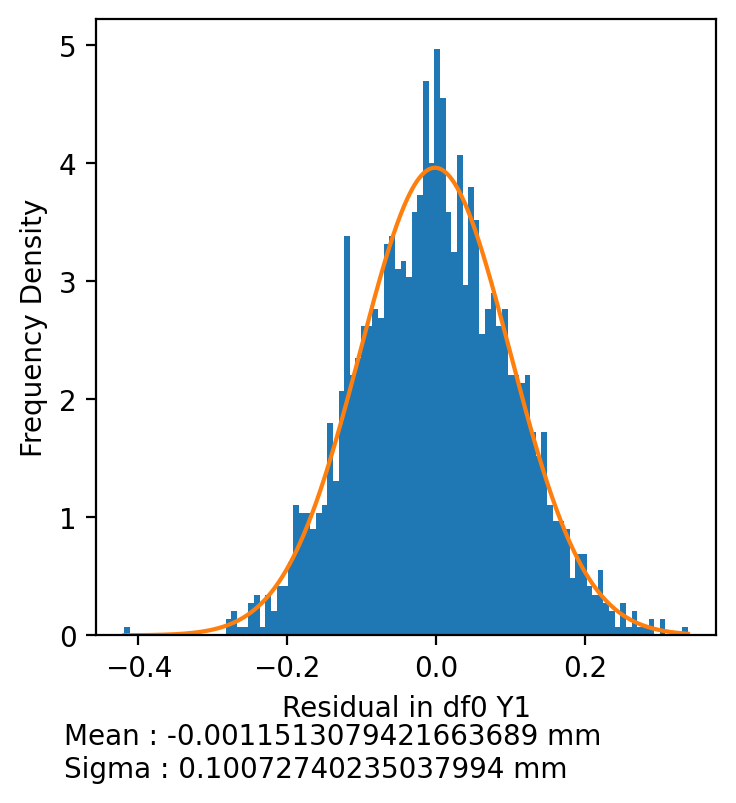

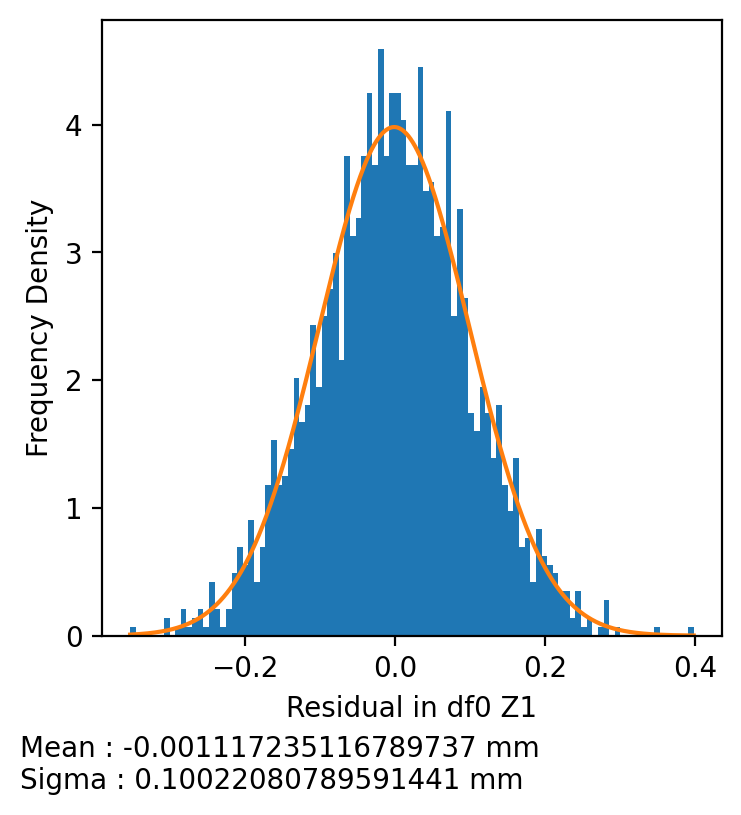

Expected Offsets:
Layer 1:
Y: 0.05
Z: 0.0
Difference Offsets:
Y: 0.05115130794216637
Z: 0.001117235116789737


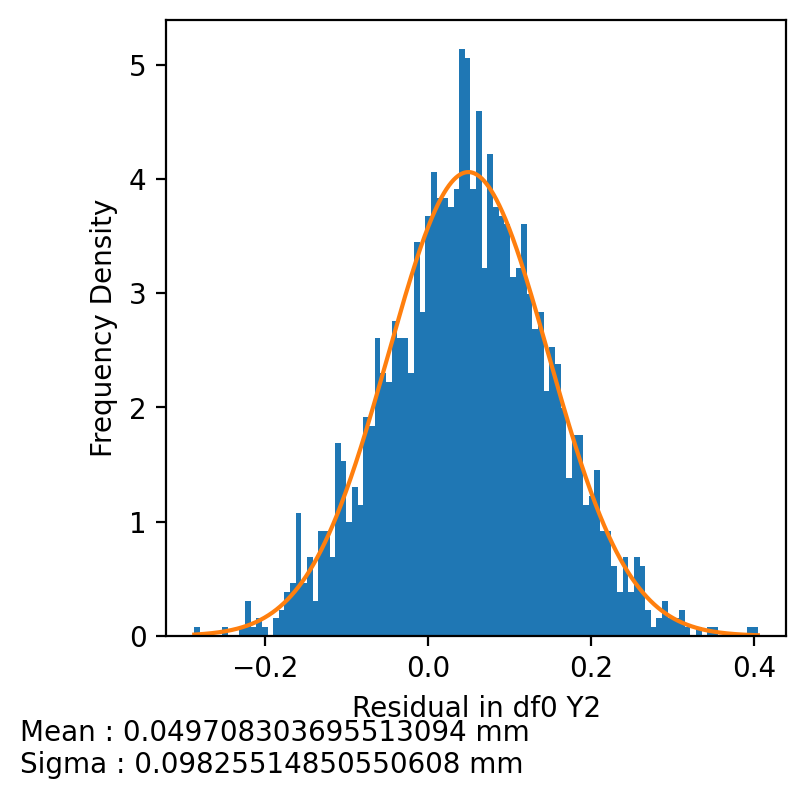

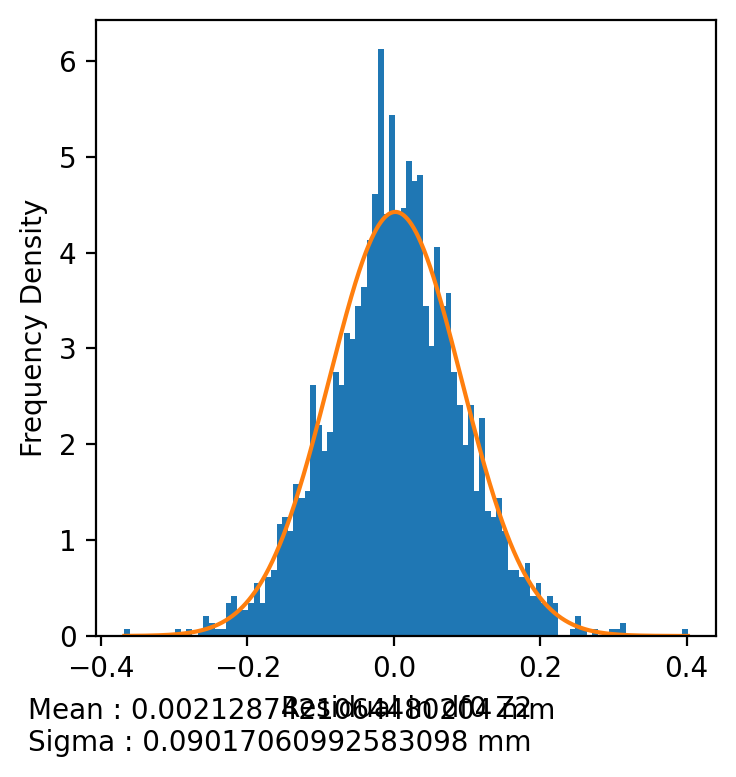

Expected Offsets:
Layer 2:
Y: 0.0
Z: 0.0
Difference Offsets:
Y: 0.049708303695513094
Z: 0.0021287421064480204


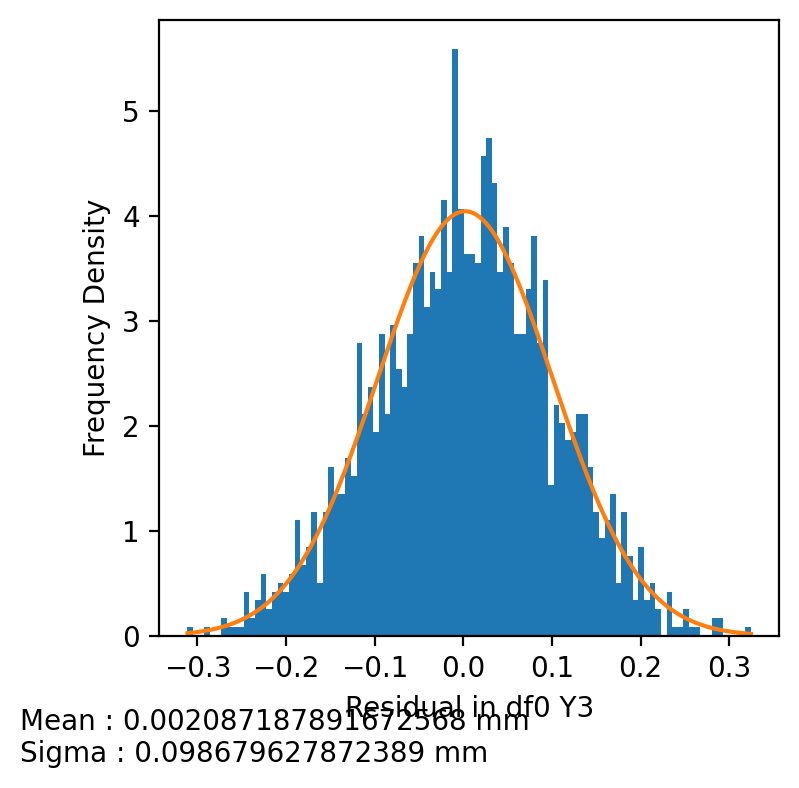

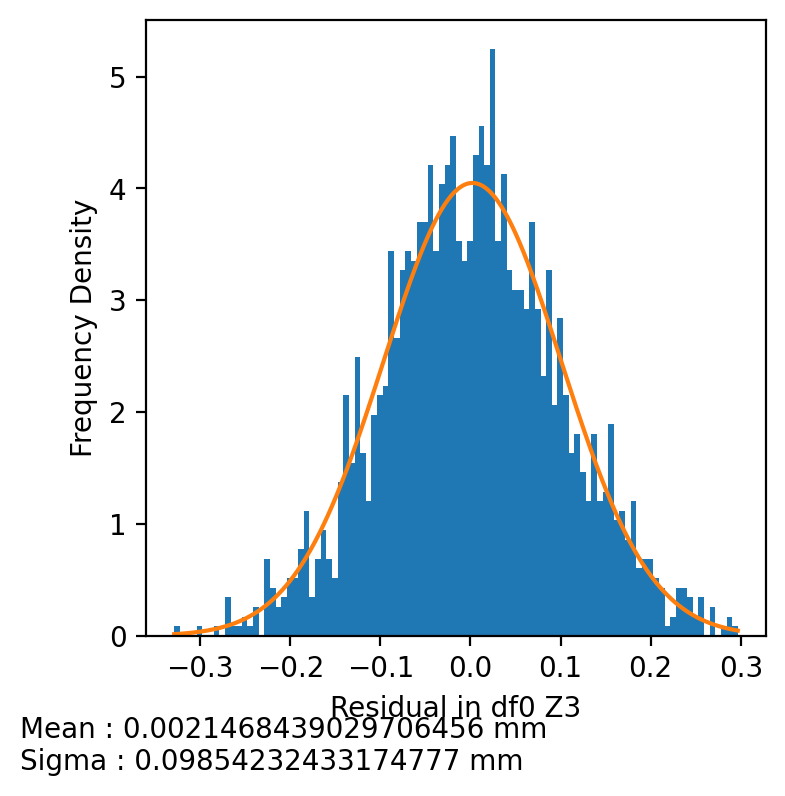

Expected Offsets:
Layer 3:
Y: 0.0
Z: 0.0
Difference Offsets:
Y: 0.002087187891672568
Z: 0.0021468439029706456


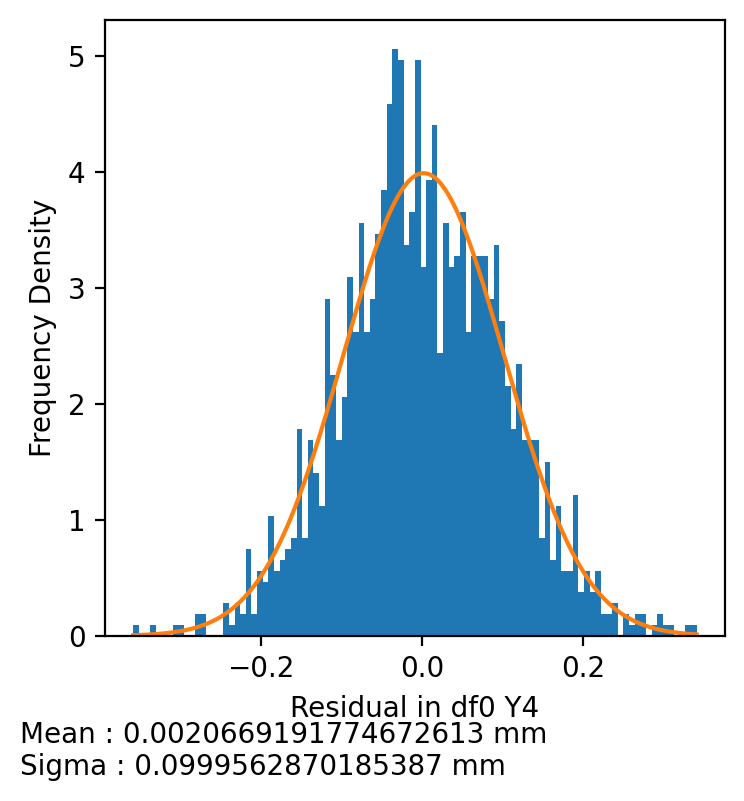

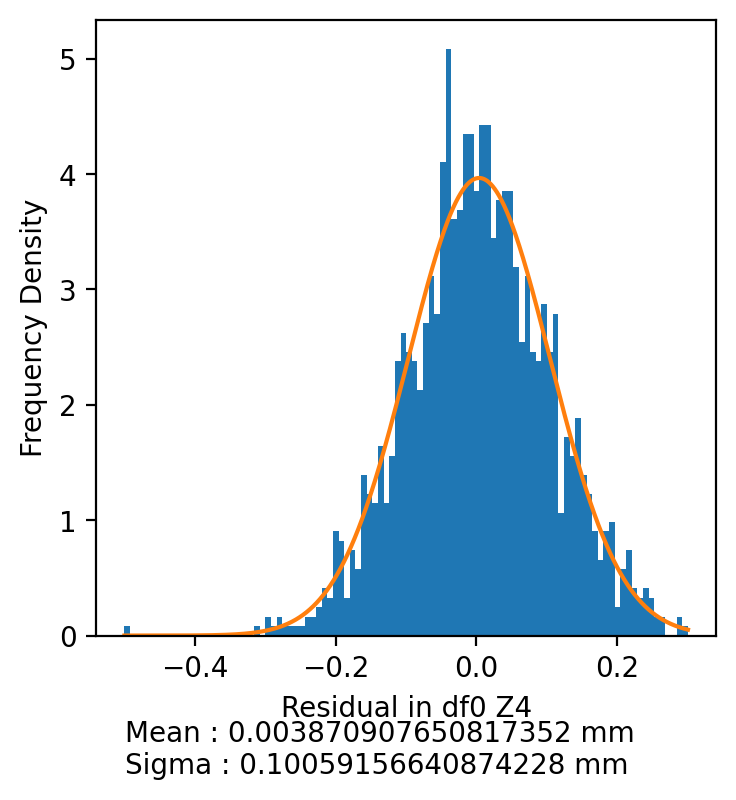

Expected Offsets:
Layer 4:
Y: 0.0
Z: 0.0
Difference Offsets:
Y: 0.0020669191774672613
Z: 0.003870907650817352


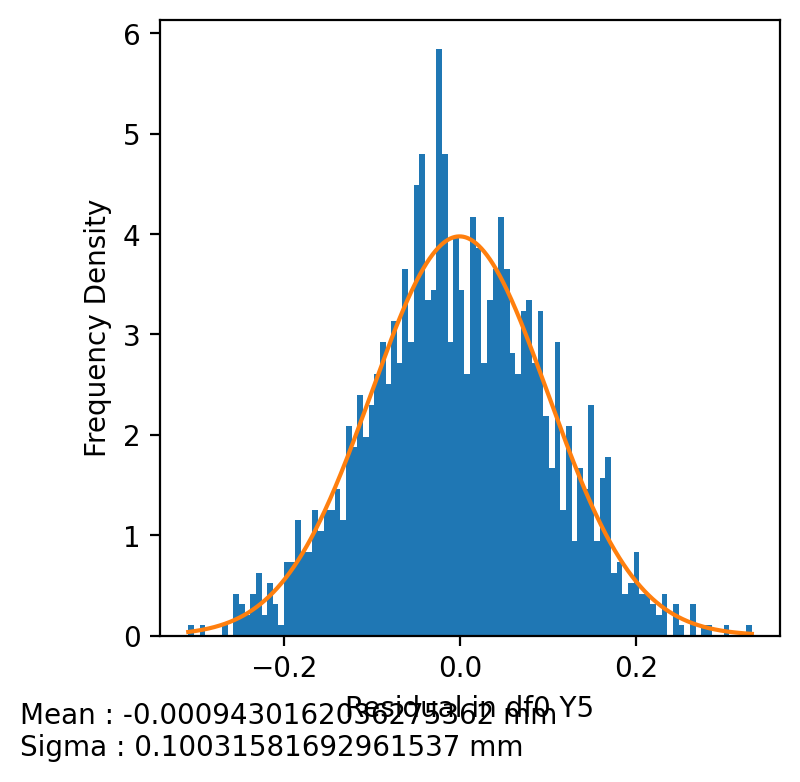

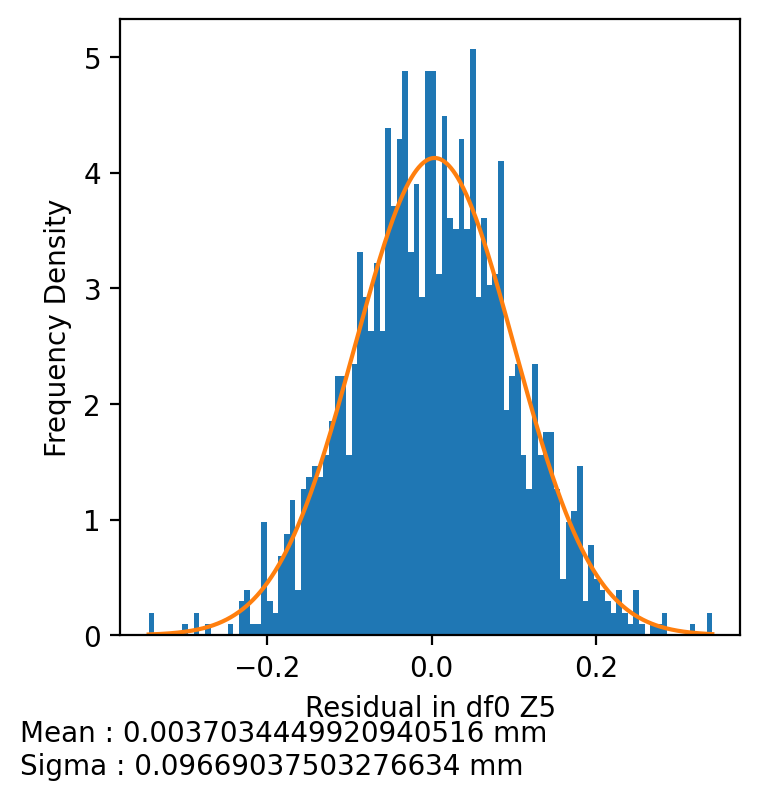

Expected Offsets:
Layer 5:
Y: 0.0
Z: 0.0
Difference Offsets:
Y: 0.0009430162036275362
Z: 0.0037034449920940516


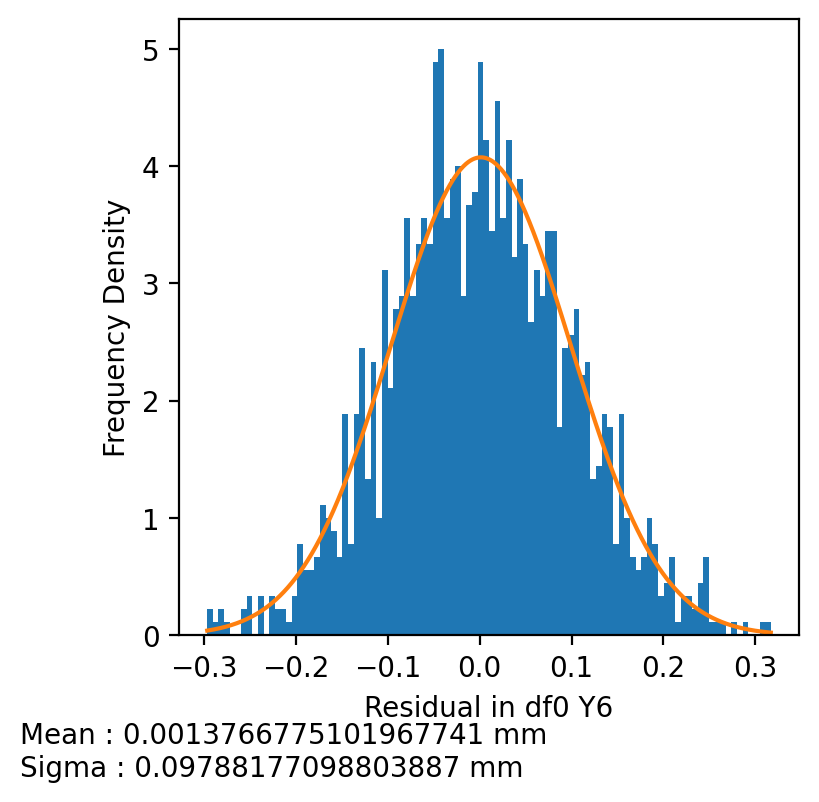

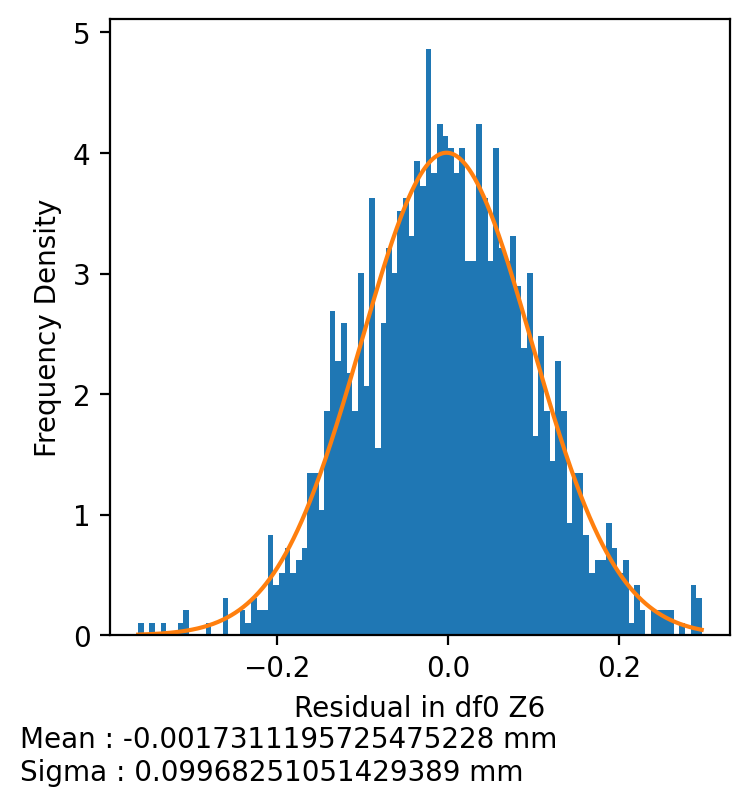

Expected Offsets:
Layer 6:
Y: 0.0
Z: 0.0
Difference Offsets:
Y: 0.0013766775101967741
Z: 0.0017311195725475228
Total Residual in Y: 0.10733341242064362
Total Residual in Z: 0.01469829334166733


In [57]:
Plot_Dataframe(df0, offsets_y[0], offsets_z[0], tag = "df0")

In [71]:
total_rel_err = np.array([])
total_res = np.array([])

for i in range(0, 6):   
    total_rel_err = np.append(total_rel_err, offset_df["REL_ERROR_Z_" + str(i+1)])
    total_rel_err = np.append(total_rel_err, offset_df["REL_ERROR_Y_" + str(i+1)])

    total_res = np.append(total_res, offset_df["RESIDUAL_Z_" + str(i+1)])
    total_res = np.append(total_res, offset_df["RESIDUAL_Y_" + str(i+1)])

total_offset = np.array([])

for i in range(0, len(offsets_y)):
    total_offset = np.append(total_offset, offsets_y[i])
    total_offset = np.append(total_offset, offsets_z[i])

In [74]:
total_res

array([-0.00096119, -0.01773454,  0.00219917, -0.01767737,  0.00188439,
       -0.01436595,  0.00080038,  0.00036653,  0.00066003, -0.00194297,
       -0.00466352,  0.00134452])

In [75]:
total_rel_err

array([        nan,         nan,         nan, -0.35354743,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan])

In [73]:
total_res_squared = np.sum(total_res*total_res)
total_offset_squared = np.sum(total_offset*total_offset)
mean_rel_err = np.mean(np.abs(total_rel_err))
median_rel_err = np.median(np.abs(total_rel_err))

print(f"Sum of residuals squared: {total_res_squared}")
print(f"Sum of offsets squared (naive answer): {total_offset_squared}")
print(f"Mean percentage error: {mean_rel_err*100}")
print(f"Median percentage error: {median_rel_err*100}")

Sum of residuals squared: 0.0008712369479932923
Sum of offsets squared (naive answer): 0.0025000000000000005
Mean percentage error: nan
Median percentage error: nan


In [67]:
def Show_Trajectory(df):
    plt.figure(figsize = (4, 4), dpi = 200)
    for row in range(0, 3):
        plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                    y = [df["GLOBAL_Y_HIT_1"][row], df["GLOBAL_Y_HIT_2"][row], df["GLOBAL_Y_HIT_3"][row], df["GLOBAL_Y_HIT_4"][row], df["GLOBAL_Y_HIT_5"][row], df["GLOBAL_Y_HIT_6"][row]],
                    s = 0.5, color = "orange")
        
        plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                    y = [df["FIT_Y_HIT_1"][row], df["FIT_Y_HIT_2"][row], df["FIT_Y_HIT_3"][row], df["FIT_Y_HIT_4"][row], df["FIT_Y_HIT_5"][row], df["FIT_Y_HIT_6"][row]],
                    s = 0.5, color = "blue")
        plt.legend(["Fit", "Truth"])
    plt.show()

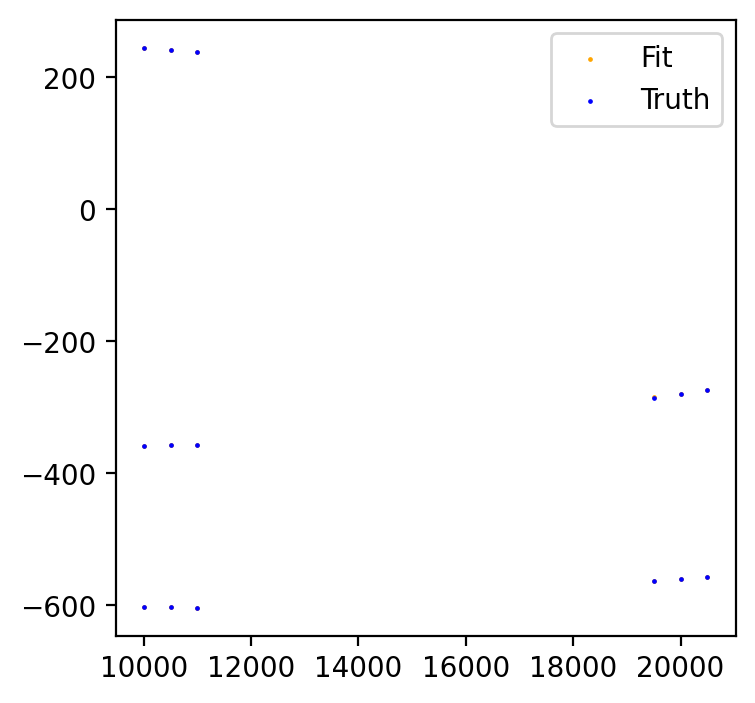

In [68]:
Show_Trajectory(df0)

In [80]:
df["FIT_Y_HIT_2"]

0       -357.973145
1        241.305481
2       -603.158264
3       1215.685425
4      -1462.714355
           ...     
1916    -553.236023
1917   -1322.719116
1918    -866.192261
1919    -222.992599
1920     800.740051
Name: FIT_Y_HIT_2, Length: 1921, dtype: float64

In [79]:
(df0["GLOBAL_Y_HIT_3"] + df0["GLOBAL_Y_HIT_1"])/2

0       -358.064255
1        241.272774
2       -603.130676
3       1215.678040
4      -1462.748657
           ...     
1916    -553.251221
1917   -1322.702637
1918    -866.154755
1919    -223.015213
1920     800.765442
Length: 1913, dtype: float64

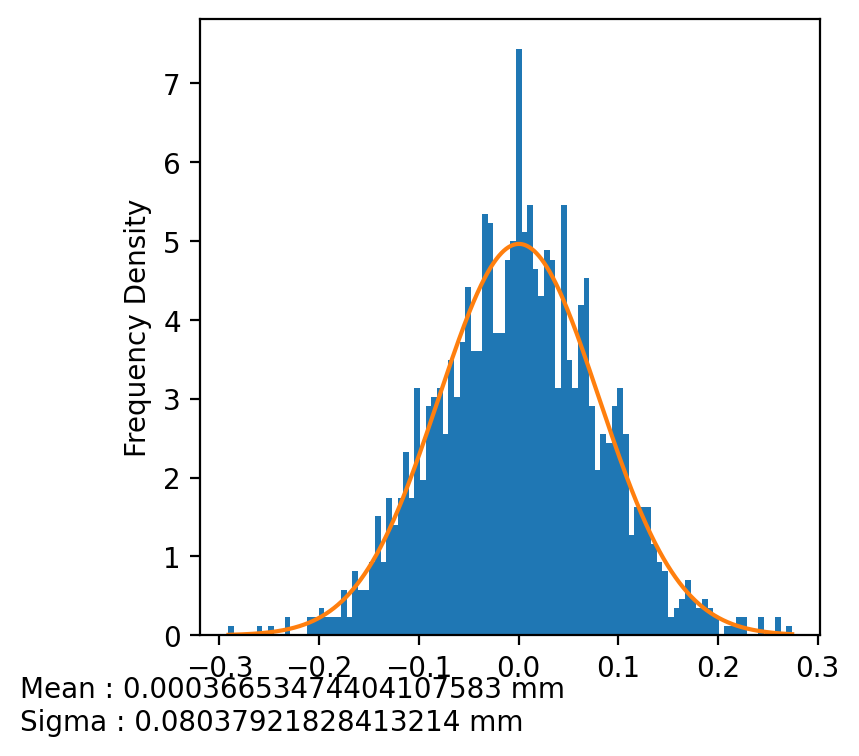

nan

In [65]:
Residual_Plot(df0["GLOBAL_Y_HIT_4"] - df0["FIT_Y_HIT_4"])
np.median(df0["GLOBAL_Y_HIT_4"] - df0["FIT_Y_HIT_4"])

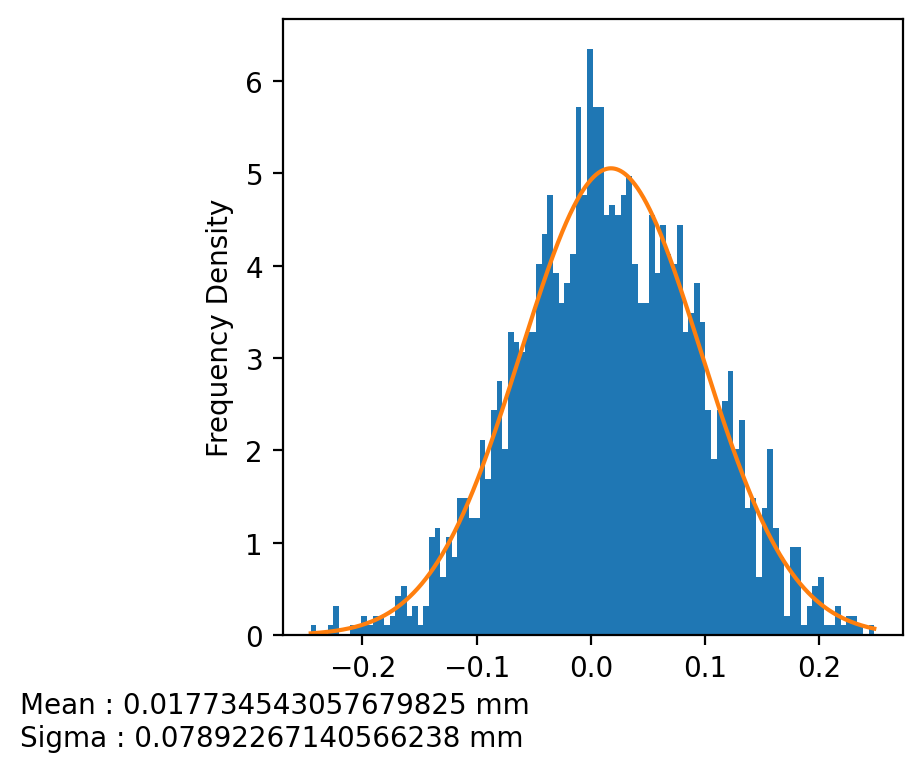

-0.0152587890625

In [64]:
Residual_Plot(df0["FIT_Y_HIT_1"]-df0["GLOBAL_Y_HIT_1"])
np.median(df0["GLOBAL_Y_HIT_1"]-df0["FIT_Y_HIT_1"])

In [ ]:
df0["GLOBAL_Y_HIT_2"]

0       1069.456909
1       1256.283447
2       1264.364990
3       -379.633789
4        803.885620
           ...     
4859   -1071.128540
4860      30.677002
4861      20.821337
4862   -1045.046143
4863    1492.643433
Name: GLOBAL_Y_HIT_2, Length: 4864, dtype: float64

In [ ]:
df0["LOCAL_Y_HIT_2"]

0       1069.452637
1       1256.279297
2       1264.360718
3       -379.638000
4        803.881409
           ...     
4859   -1071.132690
4860      30.672789
4861      20.817125
4862   -1045.050293
4863    1492.639160
Name: LOCAL_Y_HIT_2, Length: 4864, dtype: float64

(0.0, 100.0)

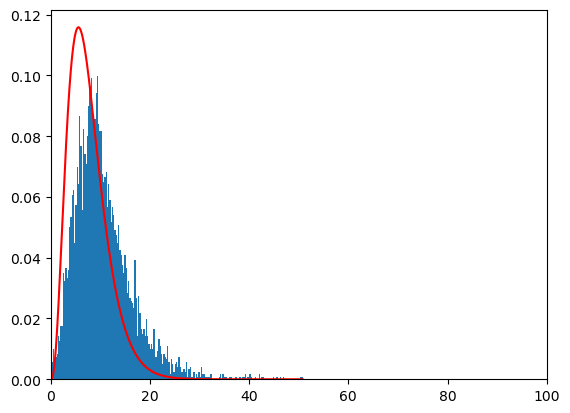

In [94]:
from scipy.stats import chi2

degrees_of_freedom, _x, _y = chi2.fit(df1["CHI2SUM"][df1["CHI2SUM"] < 100])
x_values = np.linspace(0, max(df1["CHI2SUM"][df1["CHI2SUM"] < 100]), 10000)

plt.hist(df1["CHI2SUM"][df1["CHI2SUM"] < 100], bins= 200, density = True)
plt.plot(x_values, chi2.pdf(x_values, degrees_of_freedom), 'r-', label='Fitted Chi-squared')

plt.xlim(0, 100)

In [45]:
df0

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PZ_TRUTH,PHI_TRUTH,THETA_TRUTH,...,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.002595,0.000145,1.571392,385.316529,-0.229362,383.414917,-1.0,-0.228614,0.000145,1.571393,...,81.004807,85.763657,86.328796,86.664955,80.332047,80.629036,80.926071,85.976265,86.273552,86.571022
1,-0.005382,0.001523,1.566014,185.790870,0.888588,183.804489,-1.0,0.877670,0.001521,1.566021,...,NaN,-135.730484,-138.064911,-140.432571,NaN,NaN,NaN,-135.685043,-138.076324,-140.467636
2,-0.007155,-0.007789,1.571689,139.753249,-0.124739,139.374878,-1.0,-0.124215,-0.007790,1.571688,...,-264.201691,-256.690887,-256.244354,-255.932144,-265.099823,-264.658203,-264.216614,-256.709320,-256.266266,-255.821686
3,-0.000740,0.003141,1.571539,1350.449310,-1.003002,1359.766235,-1.0,-1.013221,0.003140,1.571541,...,-419.379608,-413.092285,-412.760956,-412.338135,-420.139069,-419.767761,-419.396423,-413.083740,-412.712402,-412.341034
4,-0.002952,-0.004794,1.571629,338.781723,-0.282030,337.799805,-1.0,-0.280798,-0.004795,1.571628,...,31.710680,38.824379,39.240528,39.658211,30.913481,31.329796,31.746105,38.823406,39.239708,39.655991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,-0.002937,-0.000790,1.568601,340.485429,0.747594,340.879395,-1.0,0.749396,-0.000788,1.568598,...,258.168121,239.685165,238.427765,237.348114,260.433167,259.335480,258.237762,239.577148,238.479385,237.381577
4860,-0.004929,-0.002520,1.569446,202.876978,0.273860,202.289627,-1.0,0.272899,-0.002523,1.569447,...,-189.349243,-200.649246,-201.433060,-202.023010,-188.016907,-188.686417,-189.355927,-200.739120,-201.410477,-202.083603
4861,-0.105872,0.011890,1.542811,9.445340,0.264301,9.432276,-1.0,0.263947,0.011890,1.542809,...,308.895630,69.423248,55.467758,41.399910,337.160278,323.018494,308.882629,69.431007,55.431561,41.428162
4862,-0.009075,-0.000707,1.576615,110.192759,-0.641143,110.072609,-1.0,-0.640528,-0.000709,1.576615,...,-73.790085,-24.258957,-21.341187,-18.527267,-79.574814,-76.665001,-73.755173,-24.287992,-21.378485,-18.469162


In [35]:
np.mean(df0["FIT_Y_HIT_1"] - 2*df0["GLOBAL_Y_HIT_2"] + df0["GLOBAL_Y_HIT_3"])

0.24444209297207495

In [88]:
x1 = df0["GLOBAL_Y_HIT_2"] - (df0["GLOBAL_Y_HIT_3"] + df0["GLOBAL_Y_HIT_1"])/2
x1 = x1[np.abs(x1) < 1]
x1

0       0.249252
1       0.094551
2      -0.070862
3      -0.044983
4       0.084351
          ...   
1916    0.044128
1917   -0.042603
1918   -0.121674
1919    0.086624
1920   -0.055237
Length: 1854, dtype: float64

In [92]:
x2 = df0["GLOBAL_Y_HIT_2"] - df0["Y_TRUTH_2"]
x2 = x2[np.abs(x2) < 1]
x2

0       0.229370
1       0.062546
2      -0.088013
3      -0.058472
4       0.087036
          ...   
1916   -0.000732
1917    0.003906
1918   -0.106689
1919   -0.020248
1920    0.010193
Length: 1888, dtype: float64

In [94]:
x3 = df0["GLOBAL_Y_HIT_2"] - df0["FIT_Y_HIT_2"]
x3 = x3[np.abs(x3) < 1]
x3

0       0.158142
1       0.061844
2      -0.043274
3      -0.052368
4       0.050049
          ...   
1916    0.028931
1917   -0.026123
1918   -0.084167
1919    0.064011
1920   -0.029846
Length: 1888, dtype: float64

In [96]:
x4 = df0["FIT_Y_HIT_2"] - (df0["GLOBAL_Y_HIT_3"] + df0["GLOBAL_Y_HIT_1"])/2
x4 = x4[np.abs(x4) < 1]
x4

0       0.091110
1       0.032707
2      -0.027588
3       0.007385
4       0.034302
          ...   
1916    0.015198
1917   -0.016479
1918   -0.037506
1919    0.022614
1920   -0.025391
Length: 1854, dtype: float64

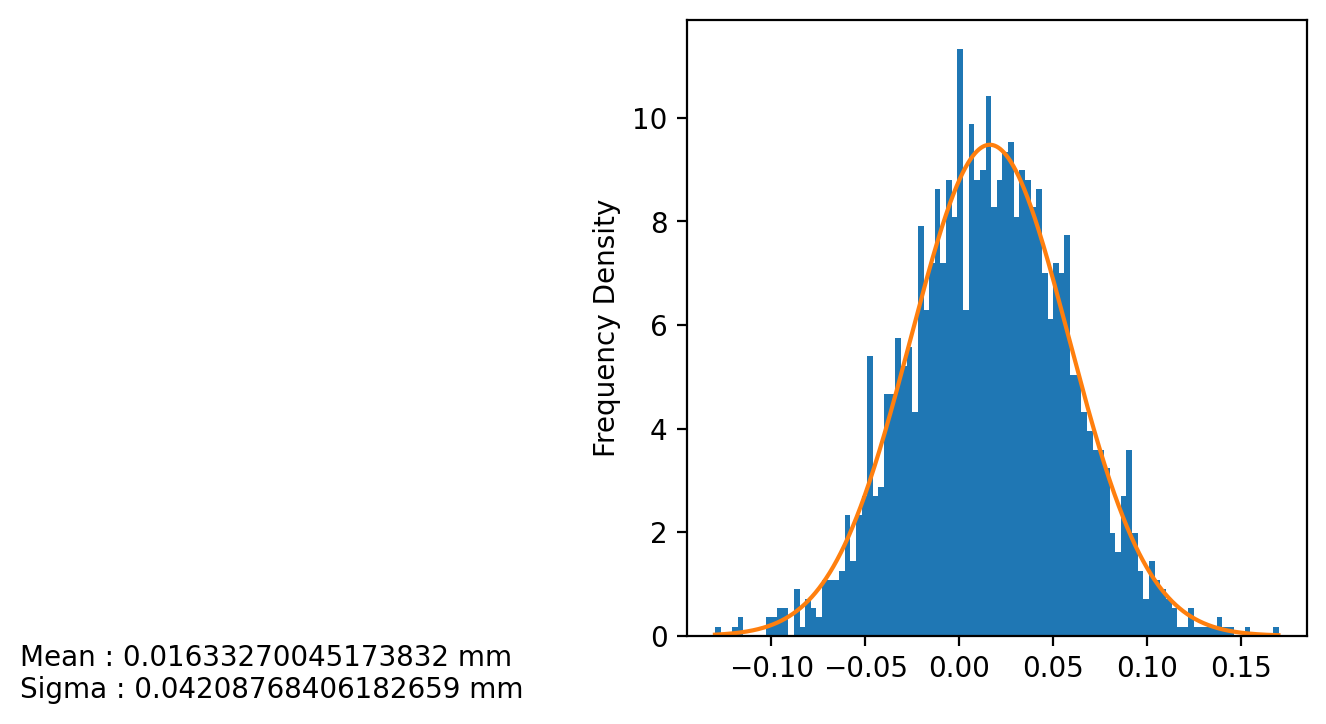

(0.01633270045173832, 0.04208768406182659, <Figure size 800x800 with 1 Axes>)

In [97]:
Residual_Plot(x4)

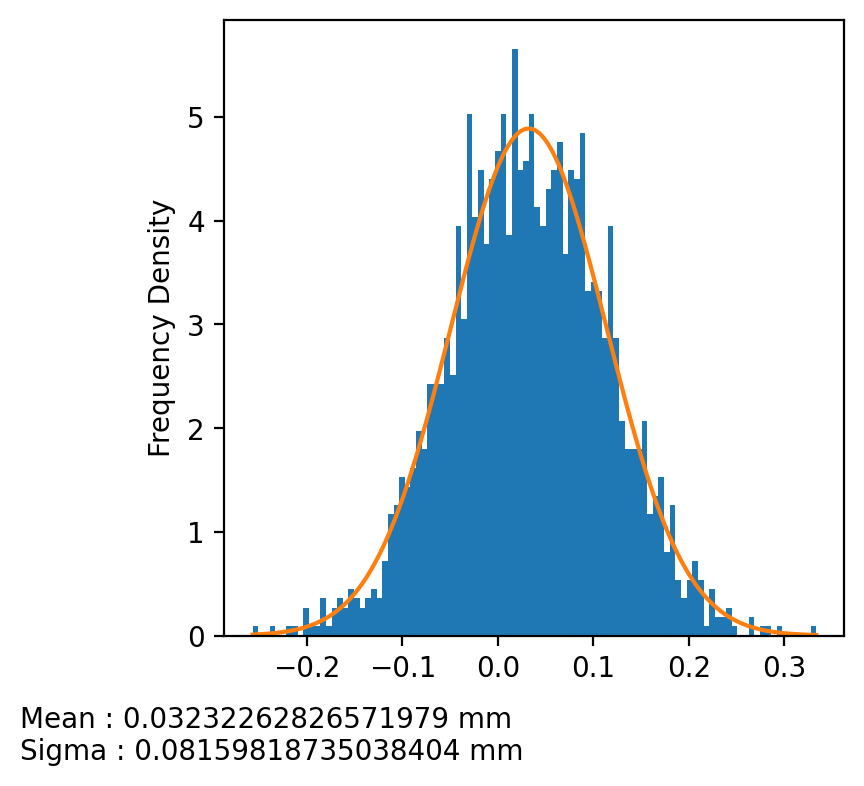

(0.03232262826571979, 0.08159818735038404, <Figure size 800x800 with 1 Axes>)

In [95]:
Residual_Plot(x3)

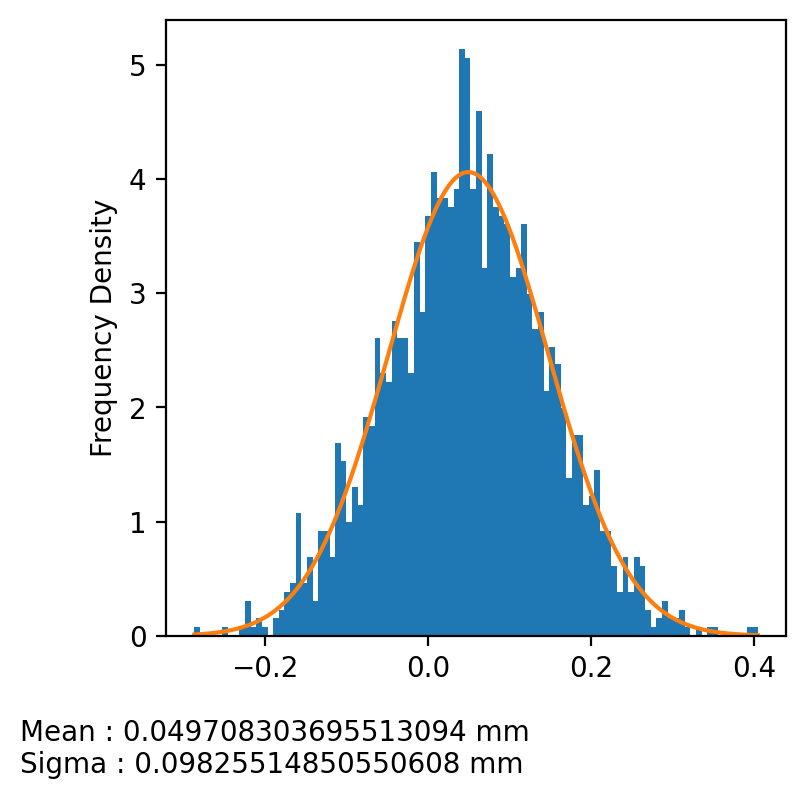

(0.049708303695513094, 0.09825514850550608, <Figure size 800x800 with 1 Axes>)

In [93]:
Residual_Plot(x2)

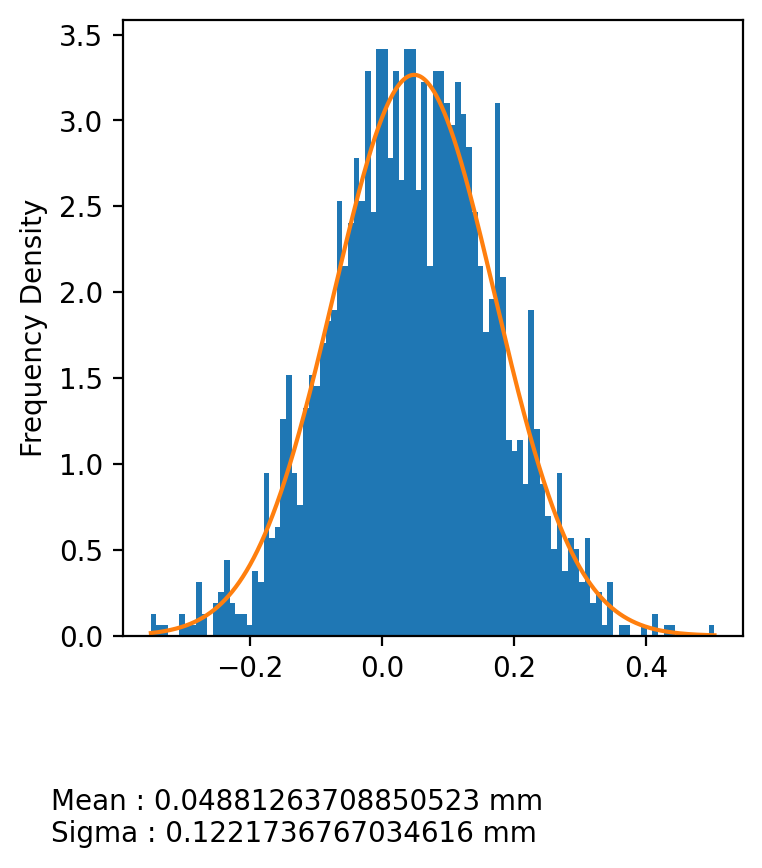

(0.04881263708850523, 0.1221736767034616, <Figure size 800x800 with 1 Axes>)

In [90]:
Residual_Plot(x1)

In [112]:
residual_df

,RESIDUAL_Y_1,RESIDUAL_Y_2,RESIDUAL_Y_3,RESIDUAL_Y_4,RESIDUAL_Y_5,RESIDUAL_Y_6,RESIDUAL_Z_1,RESIDUAL_Z_2,RESIDUAL_Z_3,RESIDUAL_Z_4,RESIDUAL_Z_5,RESIDUAL_Z_6
0,-0.074768,0.158142,-0.107544,0.123016,0.059357,-0.159698,0.082123,-0.022034,-0.070618,0.096191,0.017548,-0.101624
1,-0.178894,0.061844,0.113235,NaN,NaN,NaN,-0.011566,-0.003845,0.015076,NaN,NaN,NaN
2,0.014221,-0.043274,0.040955,-0.079163,0.033752,0.034363,-0.012878,-0.077332,0.145294,0.062103,0.092682,-0.197845
3,-0.093506,-0.052368,0.078613,0.037720,0.039429,-0.024292,-0.217590,0.057098,0.044327,0.089722,-0.019913,0.021332
4,-0.043579,0.050049,-0.005981,-0.058655,0.103271,-0.045593,0.013000,-0.061768,0.050873,-0.036026,0.058868,-0.025040
...,...,...,...,...,...,...,...,...,...,...,...,...
1916,-0.076050,0.028931,0.045593,NaN,NaN,NaN,-0.003115,0.105423,-0.101042,NaN,NaN,NaN
1917,0.038696,-0.026123,-0.005737,-0.017578,-0.040771,0.052734,0.012024,-0.033020,0.053284,-0.208466,0.011047,0.167114
1918,0.003967,-0.084167,0.070862,0.017700,-0.028687,0.017761,0.002594,0.038605,0.022430,-0.009064,-0.112244,0.069305
1919,0.086380,0.064011,-0.131592,-0.068802,0.041962,0.013184,-0.040024,-0.057877,-0.077774,-0.061676,0.184891,0.017166


In [161]:
print(np.mean(residual_df["RESIDUAL_Y_1"]))
print(np.mean(residual_df["RESIDUAL_Y_3"]))

-0.08111583644410324
-0.07911253071652069


In [162]:
print(np.mean(residual_df["RESIDUAL_Y_2"]))

0.1657984571350768


In [164]:
print(np.mean(residual_df["RESIDUAL_Y_4"]))
print(np.mean(residual_df["RESIDUAL_Y_5"]))
print(np.mean(residual_df["RESIDUAL_Y_6"]))

-0.006129187750831914
-0.0037576441236868733
0.004241773738045289


In [151]:
np.min(df0["GLOBAL_Y_HIT_2"])

-1499.039794921875

In [121]:
print(np.mean(df0["GLOBAL_Y_HIT_1"]))

-40.76038488254956


In [205]:
delta_y = 500*(np.sqrt((1+(0.1056583755/df1["FIT_PX_1"])**2)/(1+(0.1056583755/df1["FIT_PY_1"])**2)))*np.sign(df1["FIT_PY_1"])

In [226]:
delta_y = df1["FIT_PY_1"]/df1["FIT_PX_1"]*500

In [216]:
delta_y

0      -0.873305
1      -3.751436
2      -0.507116
3      -2.919013
4       1.082722
          ...   
1916    0.598650
1917   -2.199623
1918   -1.614901
1919    0.313503
1920    9.189636
Length: 1913, dtype: float64

In [219]:
df1["GLOBAL_Y_HIT_2"]-df1["GLOBAL_Y_HIT_1"]-delta_y

0       0.169448
1       0.150118
2       0.141516
3       0.192267
4       0.240398
          ...   
1916    0.173200
1917    0.378761
1918    0.305092
1919    0.407810
1920    0.113953
Length: 1913, dtype: float64

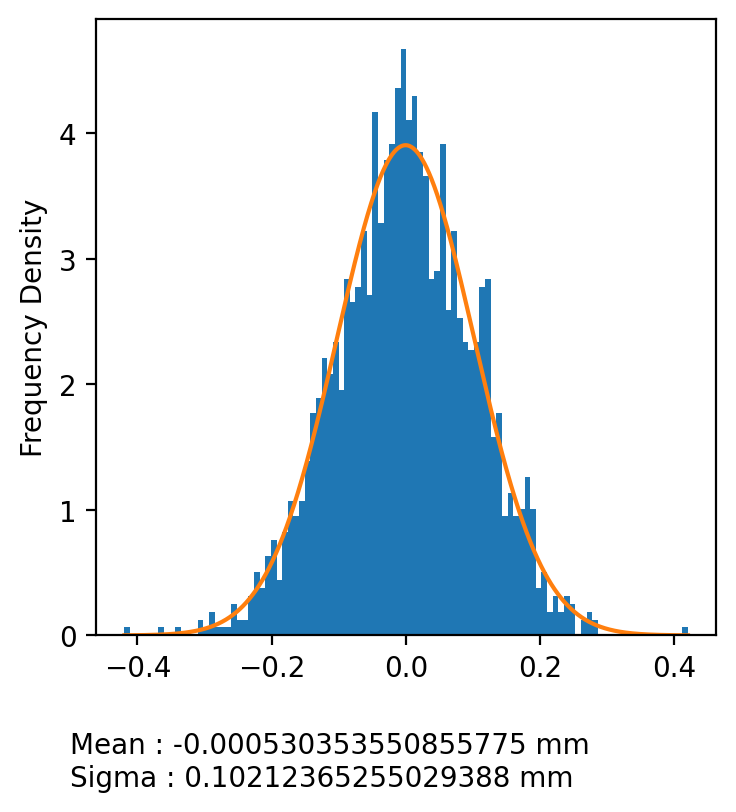

(-0.000530353550855775, 0.10212365255029388, <Figure size 800x800 with 1 Axes>)

In [234]:
test_x = df1["Y_TRUTH_2"]-df1["GLOBAL_Y_HIT_1"]-delta_y

test_x = test_x[np.abs(test_x) < 10]

Residual_Plot(test_x)

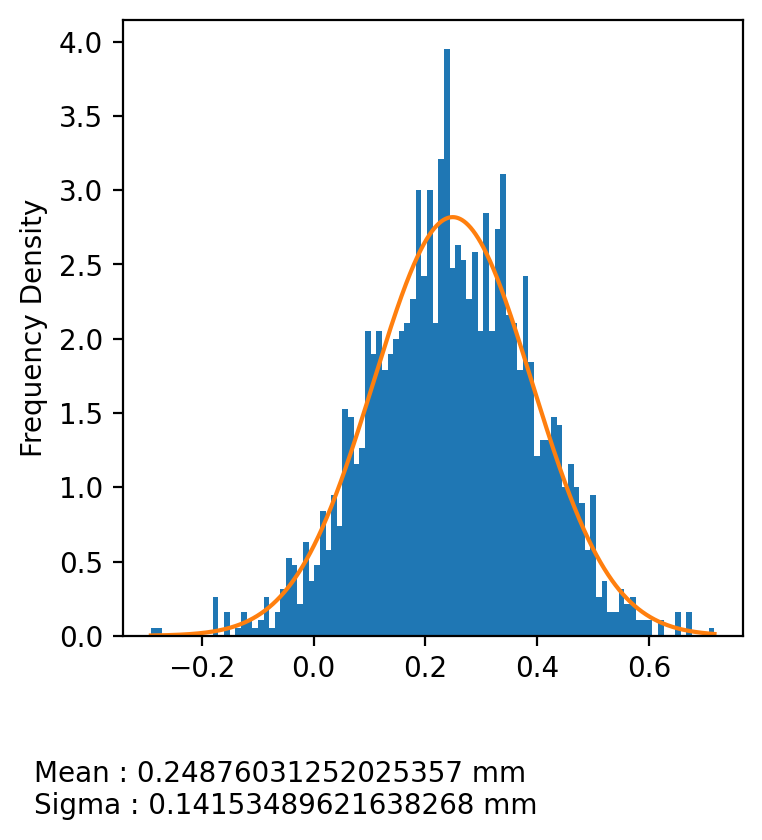

(0.24876031252025357, 0.14153489621638268, <Figure size 800x800 with 1 Axes>)

In [227]:
test_x = df1["GLOBAL_Y_HIT_2"]-df1["GLOBAL_Y_HIT_1"]-delta_y

test_x = test_x[np.abs(test_x) < 10]

Residual_Plot(test_x)